In [1]:
import pandas as pd
import altair as alt

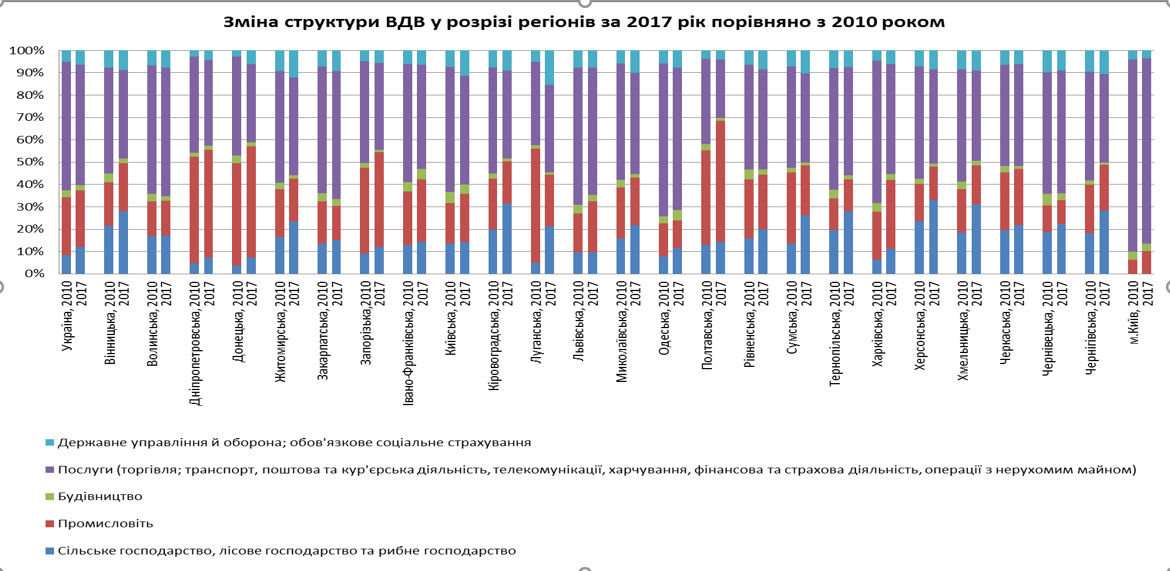

In [44]:
from IPython.display import Image
Image(filename='chart1.png') 

Подивившись на цю візуалізацію, я виділила для себе такі негативні моменти:

1) графік перенавантажений, важко зосередитися на одному регіоні та порівняти дані за 2017 та 2010 роки


2) Підписи регіонів та років зображені вертикально і це ускладнює читання


3) в стовпчиках ВДВ посортовані за алфавітом, що не несе змістового навантаження

In [4]:
df = pd.read_excel('1.4_02.xlsx')
df.head()

,"Регіон, рік",сільське господарство,промисловість,будівництво,послуги,державне управління
0,"Україна, 2010",8.3,25.9,3.3,57.3,5.2
1,"Україна, 2017",12.1,25.2,2.5,53.7,6.5
2,"Вінницька, 2010",21.6,19.3,4.1,47.4,7.6
3,"Вінницька, 2017",28.1,21.4,2.0,39.8,8.7
4,"Волинська, 2010",16.9,15.6,3.2,57.7,6.6


In [5]:
df_melted = df.melt(id_vars=['Регіон, рік'], var_name='branch', value_name='percentage')
df_melted.head()

,"Регіон, рік",branch,percentage
0,"Україна, 2010",сільське господарство,8.3
1,"Україна, 2017",сільське господарство,12.1
2,"Вінницька, 2010",сільське господарство,21.6
3,"Вінницька, 2017",сільське господарство,28.1
4,"Волинська, 2010",сільське господарство,16.9


In [20]:
df_melted["year"] = df_melted["Регіон, рік"].apply(lambda x: str(x.split(",", 1)[1]))
df_melted["region"] = df_melted["Регіон, рік"].apply(lambda x: str(x.split(",", 1)[0]))
df_melted.head()

,"Регіон, рік",branch,percentage,year,region
0,"Україна, 2010",сільське господарство,8.3,2010,Україна
1,"Україна, 2017",сільське господарство,12.1,2017,Україна
2,"Вінницька, 2010",сільське господарство,21.6,2010,Вінницька
3,"Вінницька, 2017",сільське господарство,28.1,2017,Вінницька
4,"Волинська, 2010",сільське господарство,16.9,2010,Волинська


In [24]:
input_dropdown = alt.binding_select(options = df_melted["region"].unique())
select_region = alt.selection_single(fields = ['region'], bind = input_dropdown, name = 'Select region', empty = 'all',  init={'region': 'Україна'})

In [41]:
final_chart1 = alt.Chart(df_melted,title='Зміна структури ВДВ у розрізі регіонів за 2017 рік порівняно з 2010 роком').mark_bar().transform_calculate(
    percetage_tip = "datum.percentage + '%'"
).encode(
    x = alt.X('Регіон, рік:N'),
    y = alt.Y('percentage:Q', 
              scale=alt.Scale(domain=[0, 100])),
    color = alt.Color('branch:N', title="ВДВ" ),
    tooltip = alt.Tooltip('percetage_tip:N'),
    order=alt.Order('percentage:Q',
                    sort='descending'),
    opacity = alt.condition(
        select_region,
        alt.value(1),
        alt.value(0.1)
    )
).add_selection(
    select_region
).properties(width = 950, 
              height = 500, 
              background = '#FFFFFF', 
              padding = 25
             ).configure_view(strokeWidth = 0
             ).configure_axis(labelColor = "#999999",
                              gridWidth = 1,
                              titleFont = 'Helvetica',
                              labelFont = 'Helvetica',
                              titleFontSize = 14,
                              labelFontSize = 14
             ).configure_text(font = 'Helvetica'
             ).configure_title(
                                align='center',
                                anchor='start',
                                offset = 20,
                                fontSize = 18,
                                dx = 100,
                                fontWeight = 'bold'
             ).configure_legend(
                                titleFontSize=18,
                                labelFontSize=15
             ).configure_axisX(labelPadding=5, 
                  labelAngle = -45,
                              )


alt.Chart(...)

Я поправила візуалізацію за допомогою селектора, це дає змогу вибрати конкретний регіон та побачити два стовпчики його значень за 2010 та 2017 роки, проте також слабо видно і інші регіони для порівняння. Підписи я розвернула на -45 градусів, що полегшило читання. Та посортовані ВДВ за відсотковим співвідношенням дозволяє одразу побачити, який з видів є найпопулярнішим.